In [34]:
# for loading/processing the images  
import tensorflow as tf

from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.resnet_v2 import preprocess_input 

# models 
from tensorflow.keras.applications import VGG16,VGG19,ResNet101V2
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans,MiniBatchKMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from random import randint
import pandas as pd
import pickle
# for metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,f1_score,recall_score,cohen_kappa_score,precision_score,homogeneity_score,silhouette_score


In [35]:
model = ResNet101V2(include_top=True,weights='imagenet',input_shape=(224,224,3),pooling='max')

In [36]:
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
model.summary()       

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [4]:
from numpy.ma.mrecords import fromrecords
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
!unzip "/content/drive/My Drive/newest_data.zip" -d '/content/dataset'

Archive:  /content/drive/My Drive/newest_data.zip
   creating: /content/dataset/daata/
   creating: /content/dataset/daata/caricature/
  inflating: /content/dataset/daata/caricature/001.jpg  
  inflating: /content/dataset/daata/caricature/002.jpg  
  inflating: /content/dataset/daata/caricature/003.jpg  
  inflating: /content/dataset/daata/caricature/004.jpg  
  inflating: /content/dataset/daata/caricature/005.jpg  
  inflating: /content/dataset/daata/caricature/006.jpg  
  inflating: /content/dataset/daata/caricature/007.jpg  
  inflating: /content/dataset/daata/caricature/008.jpg  
  inflating: /content/dataset/daata/caricature/009.jpg  
  inflating: /content/dataset/daata/caricature/010.jpg  
  inflating: /content/dataset/daata/caricature/011.jpg  
  inflating: /content/dataset/daata/caricature/012.jpg  
  inflating: /content/dataset/daata/caricature/013.jpg  
  inflating: /content/dataset/daata/caricature/014.jpg  
  inflating: /content/dataset/daata/caricature/015.jpg  
  inflatin

In [37]:
manif_dir = '/content/dataset/daata/manifestation/'
text_dir = '/content/dataset/daata/texte/'
carric_dir = '/content/dataset/daata/caricature/'
famille_dir = '/content/dataset/daata/famille/'
base_dir = '/content/dataset/daata'

In [17]:
!mv  -v /content/dataset/daata/famille//* /content/dataset/daata/famille/fam//


renamed '/content/dataset/daata/famille//001.jpg' -> '/content/dataset/daata/famille/fam/001.jpg'
renamed '/content/dataset/daata/famille//002.jpg' -> '/content/dataset/daata/famille/fam/002.jpg'
renamed '/content/dataset/daata/famille//003.jpg' -> '/content/dataset/daata/famille/fam/003.jpg'
renamed '/content/dataset/daata/famille//005.jpg' -> '/content/dataset/daata/famille/fam/005.jpg'
renamed '/content/dataset/daata/famille//006.jpg' -> '/content/dataset/daata/famille/fam/006.jpg'
renamed '/content/dataset/daata/famille//007.jpg' -> '/content/dataset/daata/famille/fam/007.jpg'
renamed '/content/dataset/daata/famille//008.jpg' -> '/content/dataset/daata/famille/fam/008.jpg'
renamed '/content/dataset/daata/famille//009.jpg' -> '/content/dataset/daata/famille/fam/009.jpg'
renamed '/content/dataset/daata/famille//010.jpg' -> '/content/dataset/daata/famille/fam/010.jpg'
renamed '/content/dataset/daata/famille//011.jpg' -> '/content/dataset/daata/famille/fam/011.jpg'
renamed '/content/da

In [38]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

In [39]:
manif_set = tf.keras.utils.image_dataset_from_directory(manif_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
famille_set = tf.keras.utils.image_dataset_from_directory(famille_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
texte_set = tf.keras.utils.image_dataset_from_directory(text_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)
caricature_set = tf.keras.utils.image_dataset_from_directory(carric_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 998 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [21]:
#manif_features = model.predict(manif_set)
texte_features = model.predict(texte_set)
famille_features = model.predict(famille_set)
caricature_features = model.predict(caricature_set)

In [32]:
manif_features = model.predict(manif_set)



In [27]:
famille_features.shape

(1000, 2048)

In [29]:
np.save('local_feature_texte_array',np.array(texte_features))
np.save('local_feature_famille_array',np.array(famille_features))
np.save('local_feature_caricature_array',np.array(caricature_features))

In [33]:
np.save('local_feature_manif_array',np.array(manif_features))


In [40]:
manif= np.load('local_feature_manif_array.npy')
famille = np.load('local_feature_famille_array.npy')
texte = np.load('local_feature_texte_array.npy')
caricature = np.load('local_feature_caricature_array.npy')

In [41]:
manif = manif.reshape(-1,2048)
famille = famille.reshape(-1,2048)
texte = texte.reshape(-1,2048)
caricature = caricature.reshape(-1,2048)

In [42]:
pca = PCA(n_components=150, random_state=42)
pca.fit(manif)
manif = pca.transform(manif)
pca.fit(famille)
famille = pca.transform(famille)
pca.fit(texte)
texte = pca.transform(texte)
pca.fit(caricature)
caricature = pca.transform(caricature)


In [43]:
manif.shape

(998, 150)

In [44]:
manif_df = pd.DataFrame(manif)
famille_df = pd.DataFrame(famille)
texte_df = pd.DataFrame(texte)
caricature_df = pd.DataFrame(caricature)

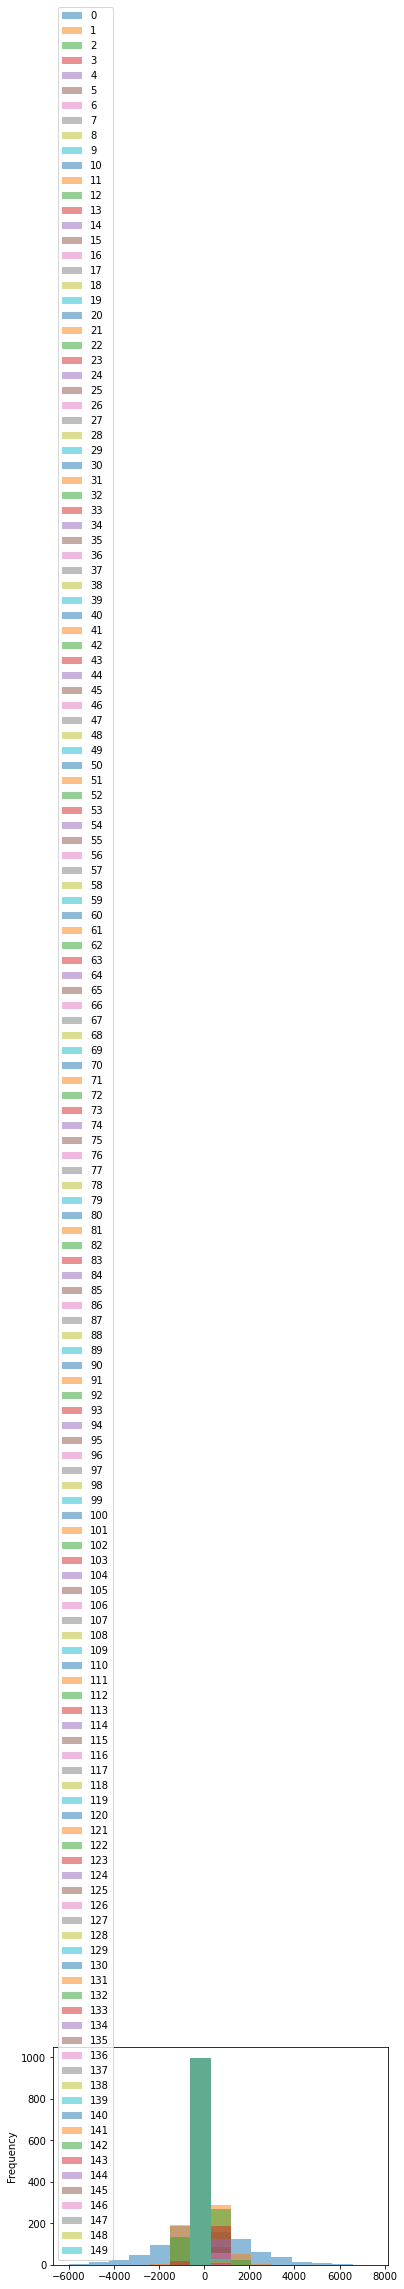

In [45]:
ax = manif_df.plot.hist(bins=15, alpha= 0.5)


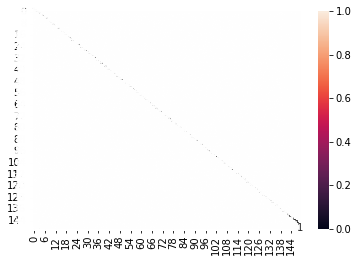

In [46]:
sns.heatmap(manif_df.corr(),annot=True)
plt.show()


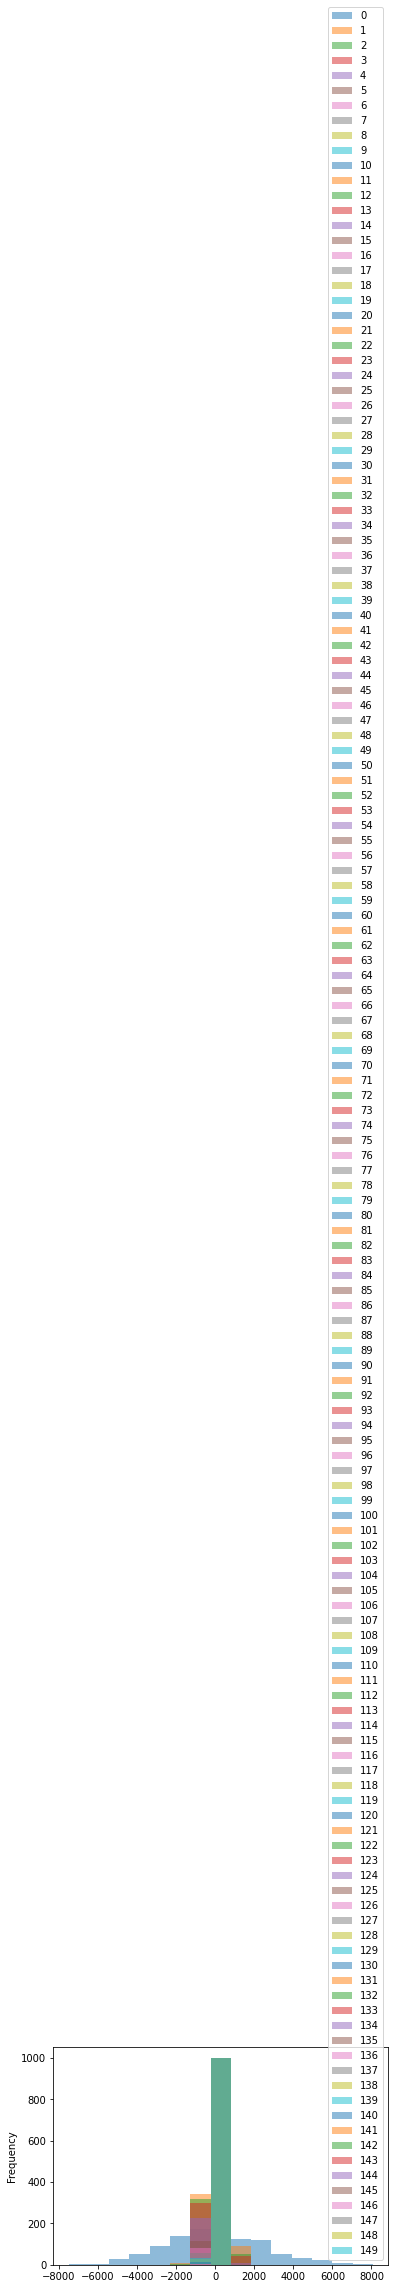

In [47]:
ax = famille_df.plot.hist(bins=15, alpha=0.5)


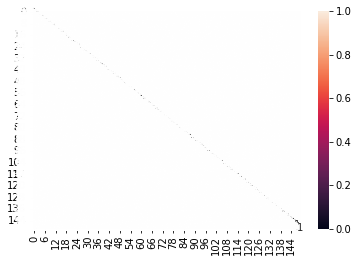

In [48]:
sns.heatmap(famille_df.corr(),annot=True)
plt.show()

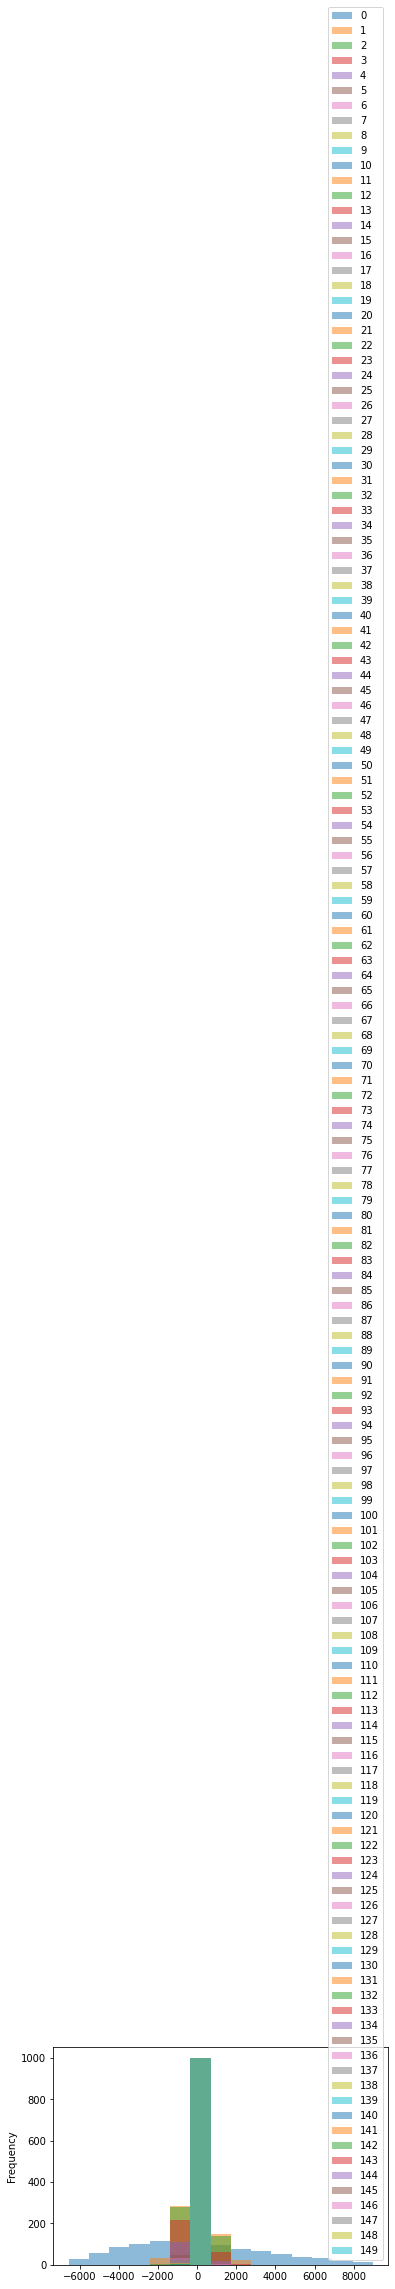

In [49]:
ax = caricature_df.plot.hist(bins=15, alpha=0.5)


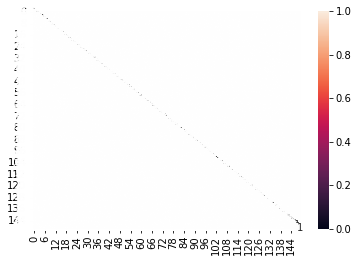

In [50]:
sns.heatmap(caricature_df.corr(),annot=True)
plt.show()

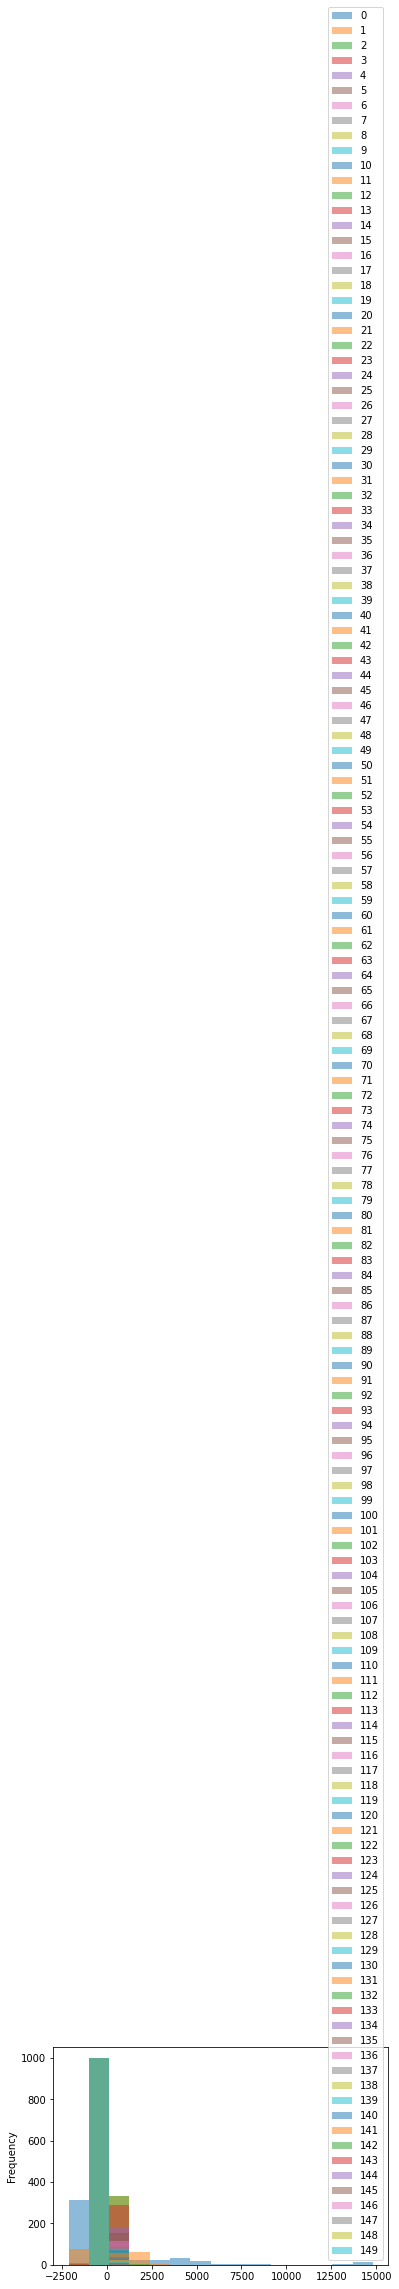

In [51]:
ax = texte_df.plot.hist(bins=15, alpha=0.5)


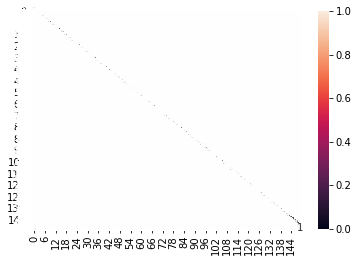

In [52]:
sns.heatmap(texte_df.corr(),annot=True)
plt.show()